In [19]:
import pandas as pd
import seaborn as sns
import networkx as nx
import plotly.express as px
import matplotlib.pyplot as plt

from utils import data_loader

df = pd.read_csv('data/flights.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998866 entries, 0 to 998865
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   from_airport_code                998866 non-null  object 
 1   from_country                     998866 non-null  object 
 2   dest_airport_code                998866 non-null  object 
 3   dest_country                     998866 non-null  object 
 4   aircraft_type                    984952 non-null  object 
 5   airline_number                   998866 non-null  object 
 6   airline_name                     998866 non-null  object 
 7   flight_number                    998866 non-null  object 
 8   departure_time                   998866 non-null  object 
 9   arrival_time                     998866 non-null  object 
 10  duration                         998866 non-null  int64  
 11  stops                            998866 non-null  int64  
 12  pr

In [20]:
misc = ['aircraft_type', 'airline_number', 'airline_name', 'flight_number', 'stops', 'price', 'currency']
c02 = ['co2_emissions', 'avg_co2_emission_for_this_route', 'co2_percentage']	
airports_and_countries = ['from_airport_code', 'from_country', 'dest_airport_code', 'dest_country']
time_and_duration = ['departure_time', 'arrival_time', 'duration', 'scan_date']
# sanity check
print("Sanity:", set(df.columns) == set(misc + c02 + airports_and_countries + time_and_duration))
df.describe(include='all')

Sanity: True


,from_airport_code,from_country,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date
count,998866,998866,998866,998866,984952,998866,998866,998866,998866,998866,998866.000000,998866.000000,997513.000000,998866,9.939980e+05,9.104640e+05,910464,998866
unique,31,18,78,47,25675,185,11012,22064,4288,21164,NaN,NaN,NaN,1,NaN,NaN,987,1
top,YYZ,China,LHR,United States,Airbus A320|Airbus A320,multi,[Lufthansa],ET706|ET706|ET706,2022-05-29 10:50:00,2022-08-29 10:15:00,NaN,NaN,NaN,USD,NaN,NaN,0%,2022-04-29 17:52:59
freq,55056,125384,20974,207877,22055,642428,58537,4327,2504,1146,NaN,NaN,NaN,998866,NaN,NaN,41841,998866
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1468.213762,1.654926,1763.370116,NaN,1.111010e+06,8.626045e+05,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,705.799677,0.652485,1985.988209,NaN,9.876891e+05,5.228906e+05,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,0.000000,9.000000,NaN,4.300000e+04,5.300000e+04,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,973.000000,1.000000,621.000000,NaN,5.220000e+05,4.100000e+05,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1410.000000,2.000000,1189.000000,NaN,9.560000e+05,8.760000e+05,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1880.000000,2.000000,2127.000000,NaN,1.367000e+06,1.184000e+06,NaN,NaN


# Time and other data (Jakob)

In [21]:
AIRPORT_DATA_PATH = "data/GlobalAirportDatabase/GlobalAirportDatabase.txt"
FLIGHT_DATA_PATH = "data/flights.csv"

FLIGHT_DATA = data_loader.load_flight_data(FLIGHT_DATA_PATH)
AIRPORT_DATA = data_loader.load_airport_data(AIRPORT_DATA_PATH, flight_data=FLIGHT_DATA)

## Flight Data

In [22]:
print(FLIGHT_DATA.dtypes)

from_airport_code                           object
from_country                                object
dest_airport_code                           object
dest_country                                object
aircraft_type                               object
airline_number                              object
airline_name                                object
flight_number                               object
departure_time                      datetime64[ns]
arrival_time                        datetime64[ns]
duration                           timedelta64[ns]
stops                                        int64
price                                      float64
currency                                    object
co2_emissions                              float64
avg_co2_emission_for_this_route            float64
co2_percentage                              object
scan_date                           datetime64[ns]
dtype: object


## Airport Data

In [23]:
print(AIRPORT_DATA.dtypes, end="\n\n")
all_airports = data_loader.all_airports_list(FLIGHT_DATA)
print("Number of airports with flights:", len(all_airports))
print("All airports with flights:", all_airports)

ICAO Code                     object
IATA Code                     object
Airport Name                  object
City/Town                     object
Country                       object
Latitude Degrees               int32
Latitude Minutes               int32
Latitude Seconds               int32
Latitude Direction            object
Longitude Degrees              int32
Longitude Minutes              int32
Longitude Seconds              int32
Longitude Direction           object
Altitude                       int32
Latitude Decimal Degrees     float64
Longitude Decimal Degrees    float64
dtype: object

Number of airports with flights: 78
All airports with flights: ['XIY', 'IST', 'MIA', 'ALG', 'SZX', 'VCP', 'MEX', 'CPH', 'SVO', 'SGN', 'MUC', 'CMN', 'CPT', 'CGK', 'PTY', 'ADD', 'ATH', 'AMS', 'CLT', 'KUL', 'MNL', 'CAN', 'MAN', 'SAW', 'TPE', 'LIM', 'NBO', 'MXP', 'ZRH', 'MEL', 'ORD', 'SHA', 'NRT', 'HND', 'FRA', 'FLL', 'BLR', 'ATL', 'DUB', 'CTU', 'LHR', 'JFK', 'SCL', 'PVG', 'SIN', 'DXB', 'LGW', 

## Time data

In [24]:
FLIGHT_DATA["calculated_arrival_time"] = FLIGHT_DATA["departure_time"] + FLIGHT_DATA["duration"]
FLIGHT_DATA["arrival_time_match_calculated"] = FLIGHT_DATA["arrival_time"] == FLIGHT_DATA["calculated_arrival_time"]

TIME_DATA = FLIGHT_DATA[["departure_time","duration","arrival_time","calculated_arrival_time", "arrival_time_match_calculated"]]
print(TIME_DATA)
print(TIME_DATA['arrival_time_match_calculated'].value_counts())

            departure_time        duration        arrival_time  \
0      2022-04-30 14:30:00 0 days 23:45:00 2022-05-01 10:15:00   
1      2022-04-30 14:30:00 0 days 23:45:00 2022-05-01 10:15:00   
2      2022-04-30 12:45:00 1 days 01:30:00 2022-05-01 10:15:00   
3      2022-04-30 14:30:00 0 days 23:45:00 2022-05-01 10:15:00   
4      2022-04-30 12:35:00 1 days 01:40:00 2022-05-01 10:15:00   
...                    ...             ...                 ...   
998861 2022-05-01 19:20:00 0 days 22:15:00 2022-05-02 22:05:00   
998862 2022-05-01 22:20:00 0 days 19:15:00 2022-05-02 22:05:00   
998863 2022-05-01 04:35:00 1 days 00:50:00 2022-05-02 09:55:00   
998864 2022-05-01 06:10:00 1 days 04:15:00 2022-05-02 14:55:00   
998865 2022-05-01 09:30:00 1 days 00:55:00 2022-05-02 14:55:00   

       calculated_arrival_time  arrival_time_match_calculated  
0          2022-05-01 14:15:00                          False  
1          2022-05-01 14:15:00                          False  
2          2022

# Airports and Countries (Maya)

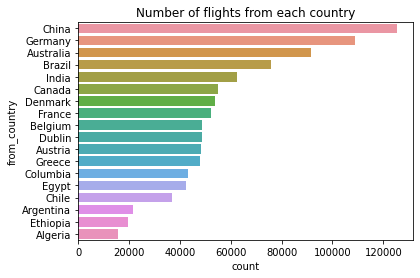

In [12]:
# Analysis of the flight volumes

sns.countplot(data=df, y='from_country', order=df['from_country'].value_counts().index)
plt.title('Number of flights from each country')
plt.show()

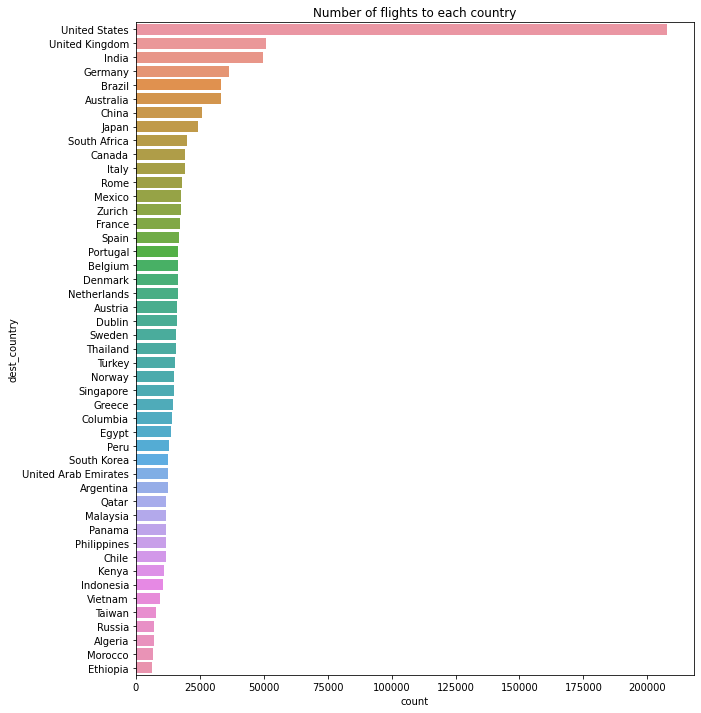

In [13]:
# Analysis of the destinations

plt.figure(figsize=(10,12))
sns.countplot(data=df, y='dest_country', order=df['dest_country'].value_counts().index)
plt.title('Number of flights to each country')
plt.show()

# Miscellaneous (Luke)

In [4]:
df[misc].head()

,aircraft_type,airline_number,airline_name,flight_number,stops
0,Airbus A318|Canadair RJ 1000|Airbus A330|Airbu...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,3
1,Airbus A318|Canadair RJ 1000|Boeing 787|Airbus...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,3
2,Airbus A320|Airbus A321|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1855|AF1855|AF1855|AF1855,3
3,Airbus A318|Airbus A320|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1491|AF1491|AF1491|AF1491,3
4,Airbus A321neo|Boeing 777|Airbus A320,multi,[Lufthansa| LATAM],LH1317|LH1317|LH1317,2


Seems like this | notation is for when we have multiple stops, which means that the airline/plane/flight number can change

### Aircraft Type

In [5]:
df['aircraft_type'].value_counts()

Airbus A320|Airbus A320                                 22055
Boeing 737|Boeing 737                                   14777
Boeing 777|Boeing 777                                    7344
Airbus A320|Boeing 777                                   7150
Airbus A321|Airbus A321                                  6057
                                                        ...  
Boeing 777|Boeing 747|Boeing 787                            1
Airbus A380|Airbus A350|Airbus A380|Boeing 787              1
Airbus A330|Bombardier Regional Jet 550|Embraer 175         1
Boeing 777|Boeing 777|Airbus A330|Airbus A320neo            1
Airbus A330-900neo|Boeing 737|Airbus A320|Boeing 757        1
Name: aircraft_type, Length: 25675, dtype: int64

In [17]:
from collections import Counter
print("Types:", Counter([type(x) for x in df['aircraft_type'].values]))
print("Float values:", Counter([x for x in df['aircraft_type'].values if type(x) == float]))
aircraft_types = [x.split('|') for x in df['aircraft_type']  if type(x) == str]
print("Unique types (flattened): ", Counter([x for sublist in aircraft_types for x in sublist]))
print("Total unique types: ", len(Counter([x for sublist in aircraft_types for x in sublist])))

Types: Counter({<class 'str'>: 984952, <class 'float'>: 13914})
Float values: Counter({nan: 13914})
Unique types (flattened):  Counter({'Airbus A320': 415466, 'Boeing 737': 324919, 'Boeing 787': 276706, 'Boeing 777': 266357, 'Airbus A321': 194235, 'Airbus A350': 157473, 'Airbus A319': 143528, 'Airbus A330': 140331, 'Airbus A320neo': 107025, 'Airbus A321neo': 84677, 'Airbus A380': 57044, 'Boeing 747': 40451, 'Embraer 190': 38590, 'Embraer 175': 34843, 'Boeing 767': 34337, 'Canadair RJ 900': 34288, 'Embraer 195': 33256, 'Airbus A220-300 Passenger': 31627, 'Boeing 737MAX 8 Passenger': 30960, 'Airbus A321 (Sharklets)': 22234, 'Airbus A330-900neo': 20635, 'Boeing 757': 18792, 'Boeing 787-10': 15323, 'Boeing 737MAX 9 Passenger': 14373, 'Airbus A340': 13946, 'Embraer 195 E2': 8645, 'De Havilland-Bombardier Dash-8': 7997, 'Embraer 170': 7065, 'Airbus A220-100 Passenger': 6141, 'Airbus A318': 4519, 'Boeing 717': 4365, 'Canadair RJ 1000': 3856, 'Canadair Reg. Jet': 3569, 'Bombardier Regional Jet

### Airline Number

In [23]:
print("Types:", Counter([type(x) for x in df['airline_number'].values]))
df['airline_number'].value_counts()
print("Non 'multi' or 2 letter codes:", [x for x in df['airline_number'].values if x != 'multi' and len(x) != 2])

Types: Counter({<class 'str'>: 998866})
[]


### Airline Name

In [28]:
df['airline_name'].value_counts()

[Lufthansa]                                          58537
[United]                                             25773
[American]                                           21612
[Turkish Airlines]                                   18050
[British Airways]                                    17907
                                                     ...  
[LATAM| Tap Air Portugal| Air Europa]                    1
[Aer Lingus| TUI fly| Avianca| Aeromexico]               1
[Tap Air Portugal| Air Europa| Wizz Air]                 1
[Aer Lingus| Flair Airlines]                             1
[Brussels Airlines| Lufthansa| SWISS| Air Serbia]        1
Name: airline_name, Length: 11012, dtype: int64

In [34]:
print("Types:", Counter([type(x) for x in df['airline_name'].values]))
print("Non [] bracketed strings:", [x for x in df['airline_name'].values if type(x) == str and x[0] != '[' and x[-1] != ']'])
airlines = [[y.strip() for y in x[1:-1].split('|')] for x in df['airline_name']]
print("Unique types (flattened): ", Counter([x for sublist in airlines for x in sublist]))
print("Total unique types: ", len(Counter([x for sublist in airlines for x in sublist])))

Types: Counter({<class 'str'>: 998866})
Non [] bracketed strings: []
Unique types (flattened):  Counter({'Lufthansa': 226594, 'United': 107171, 'LATAM': 80718, 'British Airways': 67959, 'American': 59189, 'Qantas': 52265, 'Air Canada': 51993, 'Austrian': 48314, 'China Southern': 46352, 'Singapore Airlines': 44925, 'KLM': 43794, 'Air France': 42150, 'SWISS': 41549, 'Delta': 40290, 'China Eastern': 37541, 'Turkish Airlines': 31500, 'Avianca': 31191, 'Emirates': 31183, 'EgyptAir': 30417, 'ANA': 29168, 'Iberia': 28838, 'Qatar Airways': 28717, 'SAS': 27280, 'Tap Air Portugal': 25754, 'COPA': 25715, 'Air India': 25177, 'Aer Lingus': 25037, 'Brussels Airlines': 23307, 'Ethiopian': 23124, 'Azul': 21042, 'Etihad': 20866, 'Gol': 15851, 'Aegean': 15586, 'Malaysia Airlines': 12971, 'Cathay Pacific': 12292, 'THAI': 12229, 'Virgin Australia': 11342, 'LOT': 10501, 'Vistara': 10463, 'Finnair': 10072, 'ITA': 9452, 'Hainan': 7951, 'Shanghai Airlines': 7768, 'JAL': 7003, 'Aeromexico': 6996, 'JetBlue': 68

### Flight Number

In [36]:
df['flight_number'].value_counts()

ET706|ET706|ET706                     4327
LH587|LH587|LH587                     4145
LH1317|LH1317|LH1317                  4062
IB6830|IB6830|IB6830                  3773
AA912|AA912|AA912                     2539
                                      ... 
CZ3555|CZ3555|CZ3555|CZ3555|CZ3555       1
CA1306|CA1306                            1
CA1304|CA1304|CA1304|CA1304|CA1304       1
HU7397|HU7397|HU7397                     1
SG712|SG712                              1
Name: flight_number, Length: 22064, dtype: int64

In [37]:
print("Types:", Counter([type(x) for x in df['flight_number'].values]))
flight_numbers = [x.split('|') for x in df['flight_number']  if type(x) == str]
print("Unique types (flattened): ", Counter([x for sublist in flight_numbers for x in sublist]))
print("Total unique types: ", len(Counter([x for sublist in flight_numbers for x in sublist])))

Types: Counter({<class 'str'>: 998866})
Float values: Counter()
Unique types (flattened):  Counter({'ET706': 15416, 'LA8043': 14246, 'IB6830': 14218, 'LH587': 14190, 'LH1317': 13511, 'LA8007': 13103, 'UA842': 10420, 'UA858': 9789, 'AD8704': 9483, 'OS76': 9165, 'AA912': 8968, 'LH585': 8914, 'G31323': 8218, 'LH983': 8173, 'LA8009': 7968, 'CX987': 7758, 'LA462': 7616, 'LA3281': 7569, 'UA870': 7559, 'NH970': 7530, 'CX983': 7510, 'QF93': 7267, 'LH1757': 7237, 'LH763': 7141, 'LH833': 6945, 'CM764': 6706, 'LH2447': 6649, 'AA1126': 6548, 'SQ222': 6264, 'SQ228': 6172, 'LH507': 6054, 'AD8706': 5901, 'UA846': 5868, 'AF551': 5829, 'MS852': 5784, 'DL40': 5752, 'LH1285': 5163, 'UA269': 5147, 'LA3279': 5095, 'LX1843': 5004, 'LH543': 4955, 'DL146': 4929, 'KL1124': 4921, 'LH1009': 4901, 'AF1755': 4885, 'LH977': 4691, 'LH825': 4648, 'LH761': 4647, 'LH2439': 4607, 'LA3277': 4591, 'LH979': 4579, 'LX93': 4558, 'LH2285': 4545, 'LA3283': 4540, 'A3802': 4521, 'LH1007': 4506, 'LH2325': 4483, 'AV240': 4474, 'MU

### Stops

In [41]:
df['stops'].value_counts()

2    515960
1    391153
3     71782
0     16381
4      3333
5       244
6        13
Name: stops, dtype: int64

### Currency

In [49]:
df['currency'].value_counts()

USD    998866
Name: currency, dtype: int64

Types: Counter({<class 'numpy.float64'>: 998866})
Min: 9.0
Max: 33750.0
Mean: 1763.370116479685
Median: 1189.0


<AxesSubplot:>

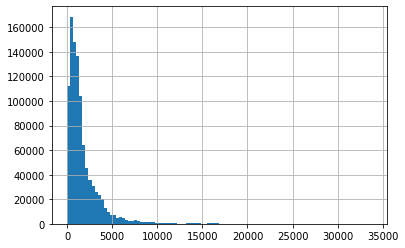

In [57]:
print("Types:", Counter([type(x) for x in df['price'].values]))
print("Min:", df['price'].min())
print("Max:", df['price'].max())
print("Mean:", df['price'].mean())
print("Median:", df['price'].median())
df['price'].hist(bins=100)

## Findings:
#### Aircraft type
- Actually a string list of aircraft types (also train, bus, etc.)
- ~14,000 nan values
- 63 unique string values, (some appear to be the same so these will require mapping)
#### Airline number
- 'multi' value makes this not very useful
- No missing values, all either multi or two letters
#### Airline Name
- Another string list of form [A|B|C]
- Fairly clean and no missing values
- 264 unique values
#### Flight Number
- Some are reused (makes sense)
- No missing values, clean
- Can change with stops, can also stay the same
#### Stops
- Surprisingly few no stop flights?
- No missing values, very clean
- Between 0 and 6 (inclusive)
#### Currency
- Can be discarded from dataset (all values = USD)
#### Price
- No missing values, very clean
- Between 9 and 33,750, median around 1100